In [17]:
import signac
import numpy as np
import matplotlib.pyplot as plt
from cmeutils.structure import gsd_rdf, bond_distribution, angle_distribution
from cmeutils.dynamics import msd_from_gsd
from utils import lj_potential
from msibi.utils.smoothing import savitzky_golay as sg

In [10]:
project = signac.get_project("../coarse-grain-sims/pair_scale_sweep/")
project2 = signac.get_project("../coarse-grain-sims/pair_scale_sweep_fixed/")

In [14]:
bad_jobs = []

for job in project2:
    #if job.doc.done == False:
    #    print(job.sp.scale_cut)
    if job.doc.done == True:
        print(job.sp.scale_cut)

1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


In [9]:
project2.detect_schema()

ProjectSchema(<len=56>)

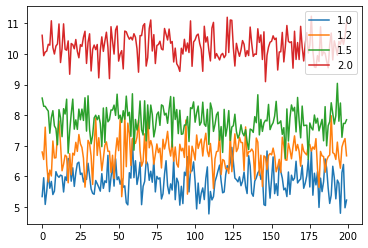

In [9]:
fig = plt.figure()
kT = 3.5

for scale, job in project.find_jobs({'kT_quench': kT}).groupby("pair_scale"):
    job = list(job)[0]
    data = np.genfromtxt(job.fn("sim_traj.txt"), names=True)
    pressure = data["mdcomputeThermodynamicQuantitiespressure"]
    plt.plot(pressure[-200:], label=scale)

plt.legend()
plt.show()

In [33]:
pair_pot = np.loadtxt("/home/chris/cme/forks/polybinder/polybinder/library/forcefields/1.0alpha-1e6steps/E-E_pair.txt")
pair_U = pair_pot[:,1]
pair_U_adj = np.copy(pair_U)
scale_indices = np.where(pair_U <= 5000)[0]
pair_U_adj[scale_indices] *= 2.0

(-5.0, 5.0)

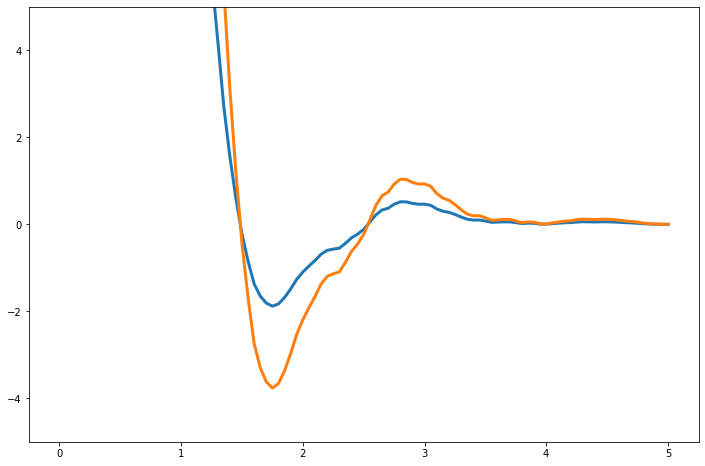

In [35]:
fig = plt.figure(figsize=(12, 8))
plt.plot(pair_pot[:,0], pair_U, linewidth=3)
plt.plot(pair_pot[:,0], pair_U_adj, linewidth=3)
plt.ylim(-5, 5)

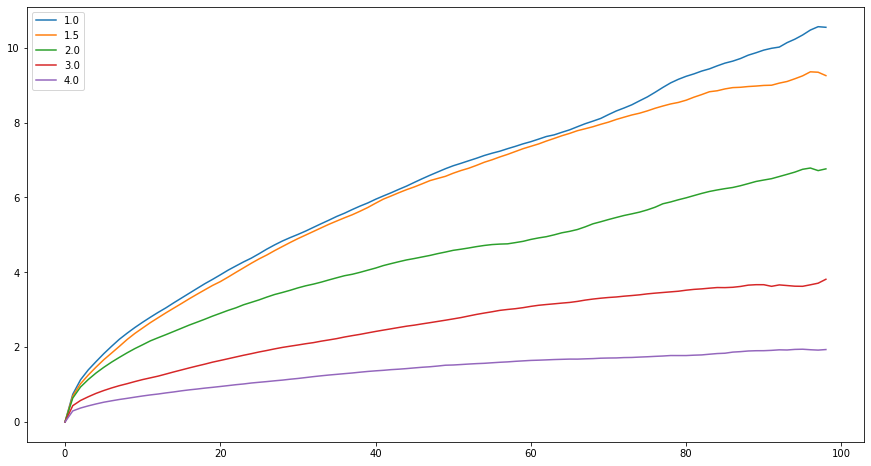

In [15]:
fig = plt.figure(figsize=(15,8))
kT = 3.5
for scale, job in project2.find_jobs({'kT_quench': kT, "scale_cut": 1.0}).groupby("pair_scale"):
    try:
        job = list(job)[0]
        msd = msd_from_gsd(gsdfile=job.fn("sim_traj.gsd"), start=-100, stop=-1)
        plt.plot(msd.msd, label=scale)
    except:
        print(job)
    
plt.legend()
plt.show()

/home/chris/miniconda3/envs/msibi/lib/python3.9/site-packages/signac/contrib/project.py:1066: DeprecationWarning: The doc_filter argument was deprecated in version 1.7 and will be removed in version 3.0. Users should instead use a filter with a 'doc.' prefix. For example, `doc_filter={'foo': 'bar'}` is equivalent to `filter={'doc.foo': 'bar'}`. See https://docs.signac.io/en/latest/query.html#query-namespaces for more information.
  warnings.warn(DOC_FILTER_WARNING, DeprecationWarning)


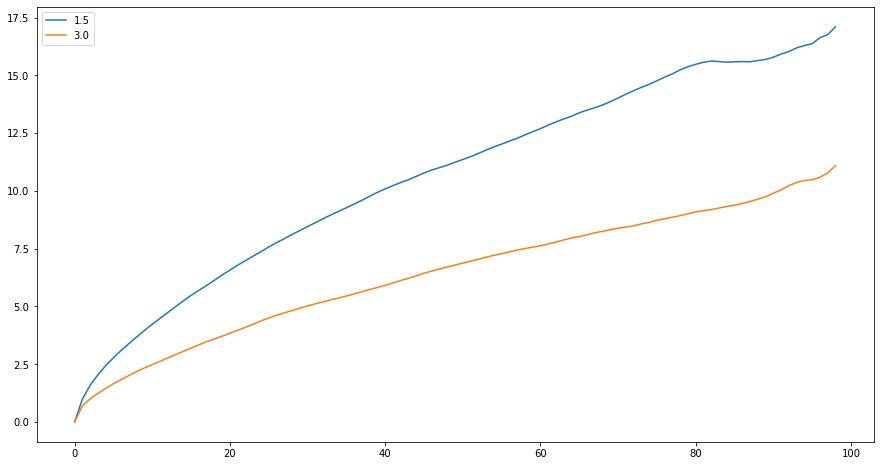

In [23]:
fig = plt.figure(figsize=(15,8))
kT = 4.5
for scale, job in project2.find_jobs({'kT_quench': kT, "scale_cut": 1.0}, {"done": True}).groupby("pair_scale"):
    job = list(job)[0]
    msd = msd_from_gsd(gsdfile=job.fn("sim_traj.gsd"), start=-100, stop=-1)
    plt.plot(msd.msd, label=scale)
    
plt.legend()
plt.show()

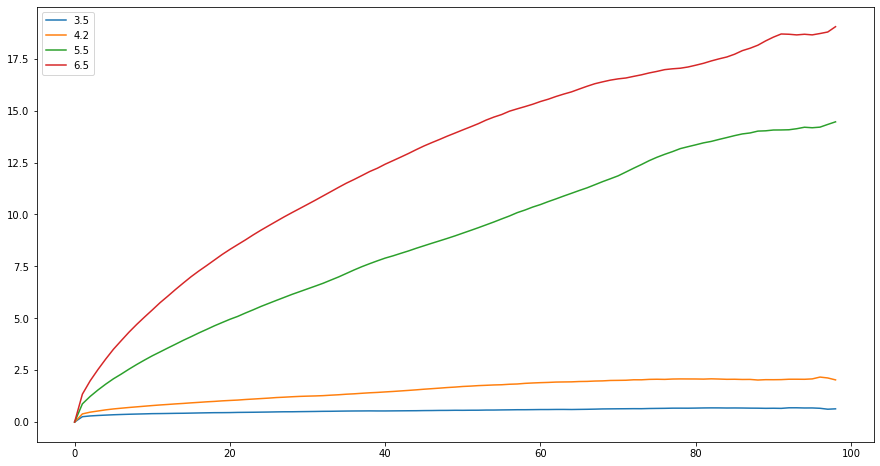

In [37]:
scale = 2.0
fig = plt.figure(figsize=(15, 8))
for kT, job in project.find_jobs({'pair_scale': scale}).groupby("kT_quench"):
    job = list(job)[0]
    msd = msd_from_gsd(gsdfile=job.fn("sim_traj.gsd"), start=-100, stop=-1)
    plt.plot(msd.msd, label=kT)
    
plt.legend()
plt.show()

/home/chris/miniconda3/envs/msibi/lib/python3.9/site-packages/signac/contrib/project.py:1066: DeprecationWarning: The doc_filter argument was deprecated in version 1.7 and will be removed in version 3.0. Users should instead use a filter with a 'doc.' prefix. For example, `doc_filter={'foo': 'bar'}` is equivalent to `filter={'doc.foo': 'bar'}`. See https://docs.signac.io/en/latest/query.html#query-namespaces for more information.
  warnings.warn(DOC_FILTER_WARNING, DeprecationWarning)


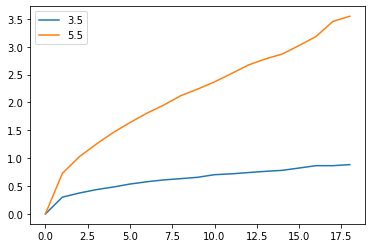

In [22]:
scale = 4.0
for kT, job in project2.find_jobs({'pair_scale': scale}, {"done": True}).groupby("kT_quench"):
    job = list(job)[0]
    msd = msd_from_gsd(gsdfile=job.fn("sim_traj.gsd"), start=-20, stop=-1)
    plt.plot(msd.msd, label=kT)
    
plt.legend()
plt.show()

In [ ]:
fig = plt.figure()
pair = ["E", "E"]
kT = 4.2
for scale, job in project2.find_jobs({'kT_quench': kT}).groupby("pair_scale"):
    job = list(job)[0]
    rdf, N = gsd_rdf(
        gsdfile=job.fn("sim_traj.gsd"), A_name=pair[0], B_name=pair[1], start=-20, stop=-1, r_max=4.0
    )
    plt.plot(rdf.bin_centers, rdf.rdf * N, label=scale)
    
plt.legend()
plt.show()

c34154cad40b34f68e9c678d796e8d42 1.0
10d8814b722253e7035f97c85d0dcd72 1.5
d72f32e08f08cebf21241126a256dcc9 2.0
bc454bc9b7a93b5b5a6ab83376b4caf9 3.0
cc3d690f3a8c7f10652471327e43be17 4.0


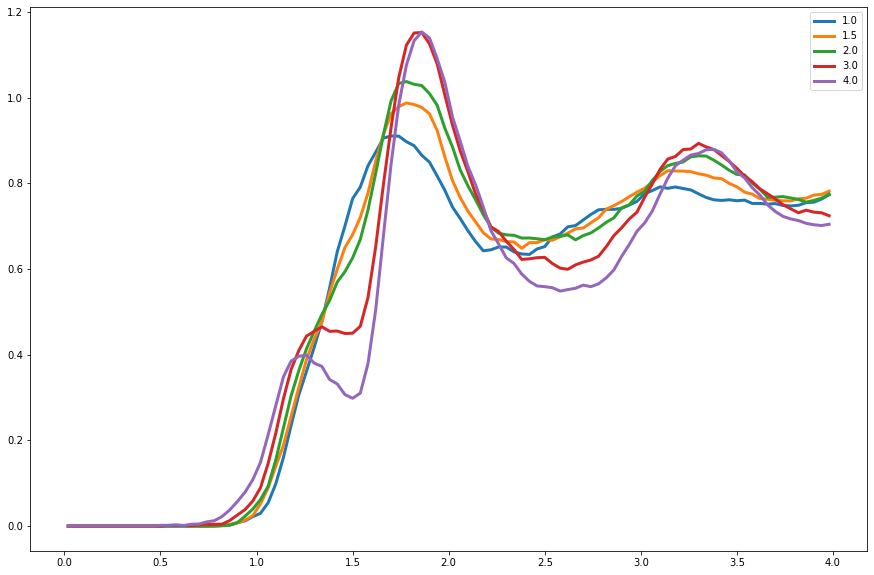

In [24]:
fig = plt.figure(figsize=(15, 10))
pair = ["K", "K"]
kT = 3.5
for scale, job in project2.find_jobs({'kT_quench': kT, "scale_cut": 1.0}).groupby("pair_scale"):
    job = list(job)[0]
    print(job.id, scale)
    rdf, N = gsd_rdf(
        gsdfile=job.fn("sim_traj.gsd"), A_name=pair[0], B_name=pair[1], start=-20, stop=-1, r_max=4.0
    )
    smooth = sg(rdf.rdf*N, window_size=3, order=1)
    plt.plot(rdf.bin_centers, smooth, label=scale, linewidth=3)
    
plt.legend()
plt.show()

In [ ]:
fig = plt.figure()
pair = ["E", "E"]
kT = 6.5
for scale, job in project.find_jobs({'kT_quench': kT}).groupby("pair_scale"):
    job = list(job)[0]
    rdf, N = gsd_rdf(
        gsdfile=job.fn("sim_traj.gsd"), A_name=pair[0], B_name=pair[1], start=-20, stop=-1, r_max=4.0
    )
    plt.plot(rdf.bin_centers, rdf.rdf * N, label=scale)
    
plt.legend()
plt.show()

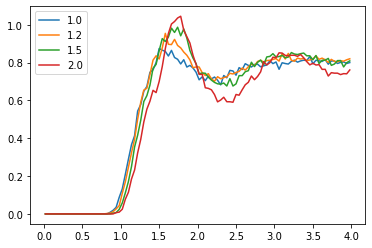

In [26]:
fig = plt.figure()
pair = ["E", "K"]
for scale, job in project.find_jobs({'kT_quench': kT}).groupby("pair_scale"):
    job = list(job)[0]
    rdf, N = gsd_rdf(
        gsdfile=job.fn("sim_traj.gsd"), A_name=pair[0], B_name=pair[1], start=-20, stop=-1, r_max=4.0
    )
    plt.plot(rdf.bin_centers, rdf.rdf * N, label=scale)
    
plt.legend()
plt.show()

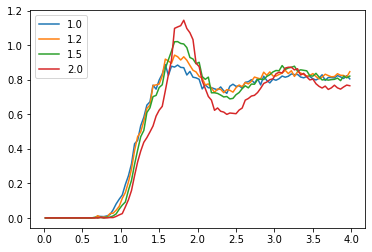

In [27]:
fig = plt.figure()
pair = ["K", "K"]
for scale, job in project.find_jobs({'kT_quench': kT}).groupby("pair_scale"):
    job = list(job)[0]
    rdf, N = gsd_rdf(
        gsdfile=job.fn("sim_traj.gsd"), A_name=pair[0], B_name=pair[1], start=-20, stop=-1, r_max=4.0
    )
    plt.plot(rdf.bin_centers, rdf.rdf * N, label=scale)
    
plt.legend()
plt.show()